In [25]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os

In [26]:
df = pd.read_csv('gdp.csv')

In [27]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [4]:
df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [5]:
df[df.duplicated()]

,Country Name,Country Code,Year,Value


# Checking description of each column

In [28]:
df["Country Name"].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [30]:
df["Country Code"].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [8]:
df["Year"].describe()  #years arer in the range [1960,2016]

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [31]:
df["Value"].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

# Analysing GDP of  countries

<Axes: xlabel='Years', ylabel='GDP'>

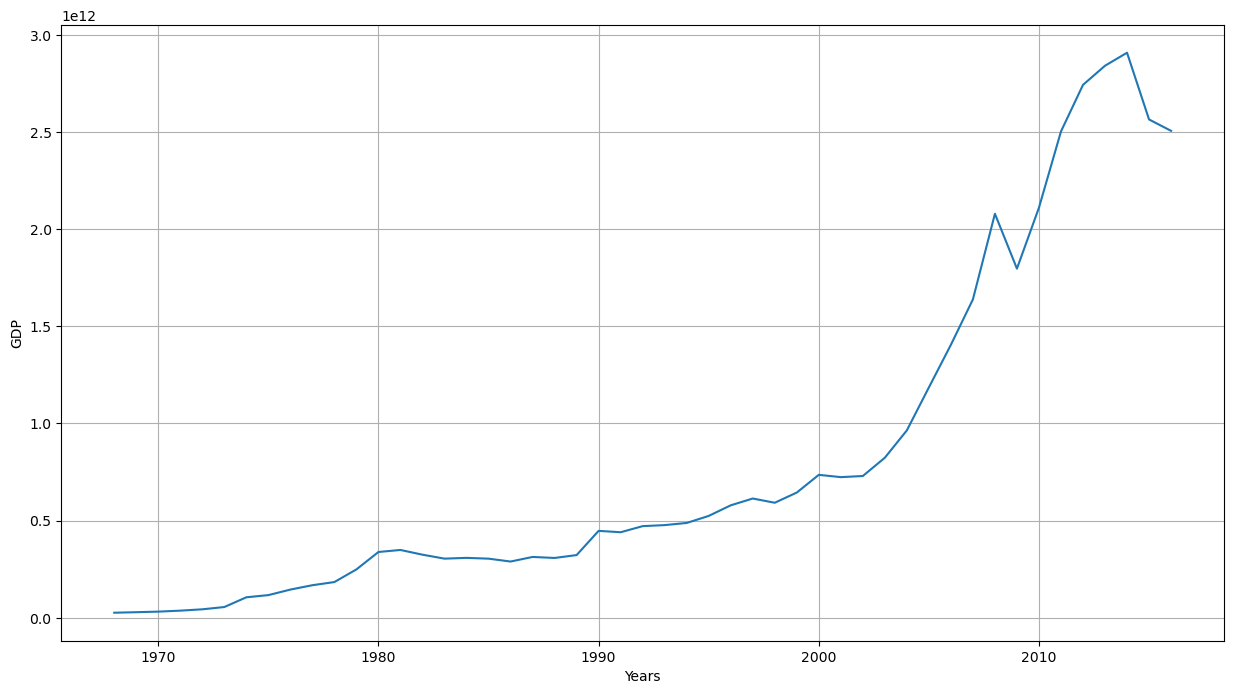

In [32]:
df[df["Country Name"] == "Arab World"].plot(kind = 'line', x = 'Year' ,y = 'Value',figsize = (15,8),
             legend = False, grid = True, ylabel = 'GDP', xlabel = 'Years')

<Axes: xlabel='Years', ylabel='GDP'>

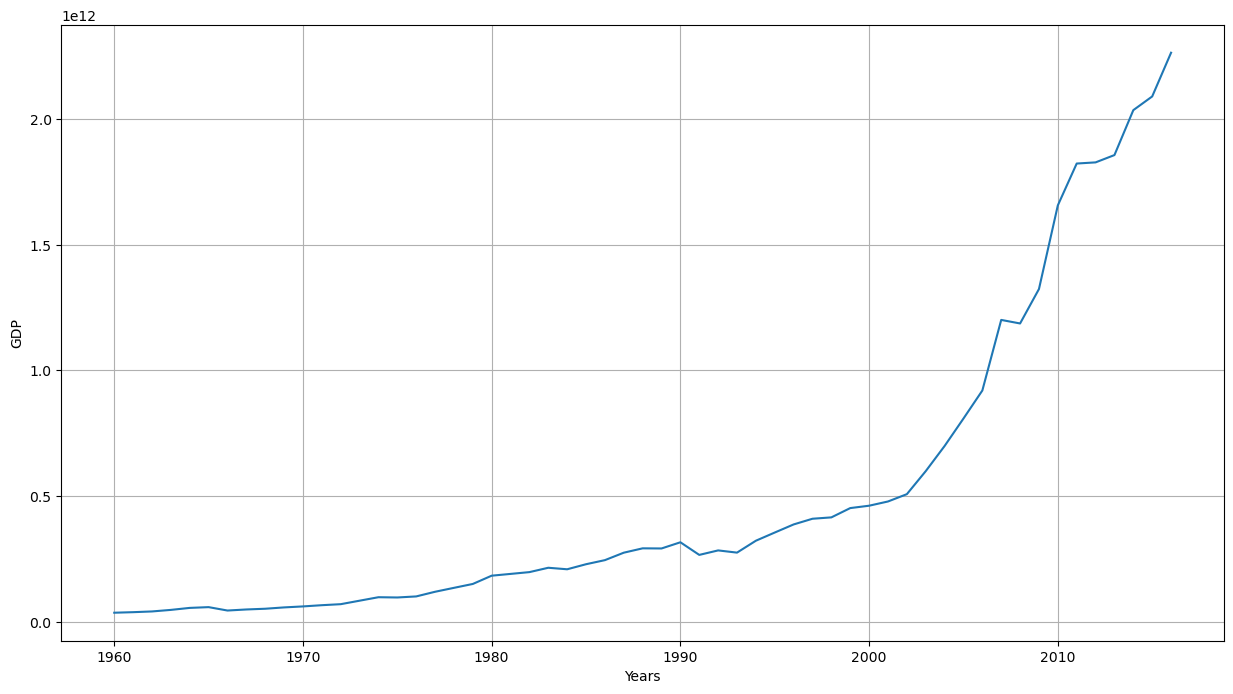

In [11]:
df[df["Country Name"] == "India"].plot(kind = 'line', x = 'Year' ,y = 'Value',figsize = (15,8),
             legend = False, grid = True, ylabel = 'GDP', xlabel = 'Years')

### Analysing the GDP of first 10 categories which are having high GDP value

In [33]:
country_names = df.groupby('Country Name')["Value"].sum().sort_values(ascending = False).index
country_names[:11]

Index(['World', 'High income', 'OECD members', 'Post-demographic dividend',
       'Europe & Central Asia', 'North America', 'European Union',
       'IDA & IBRD total', 'United States', 'Low & middle income',
       'Middle income'],
      dtype='object', name='Country Name')

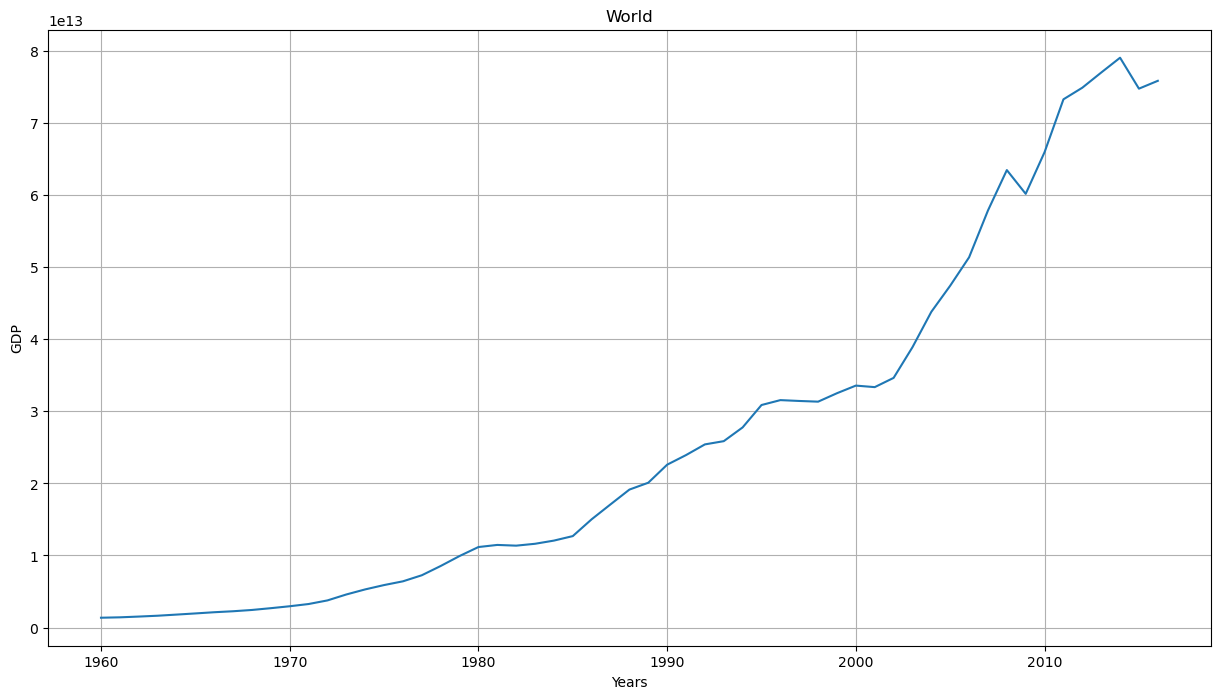

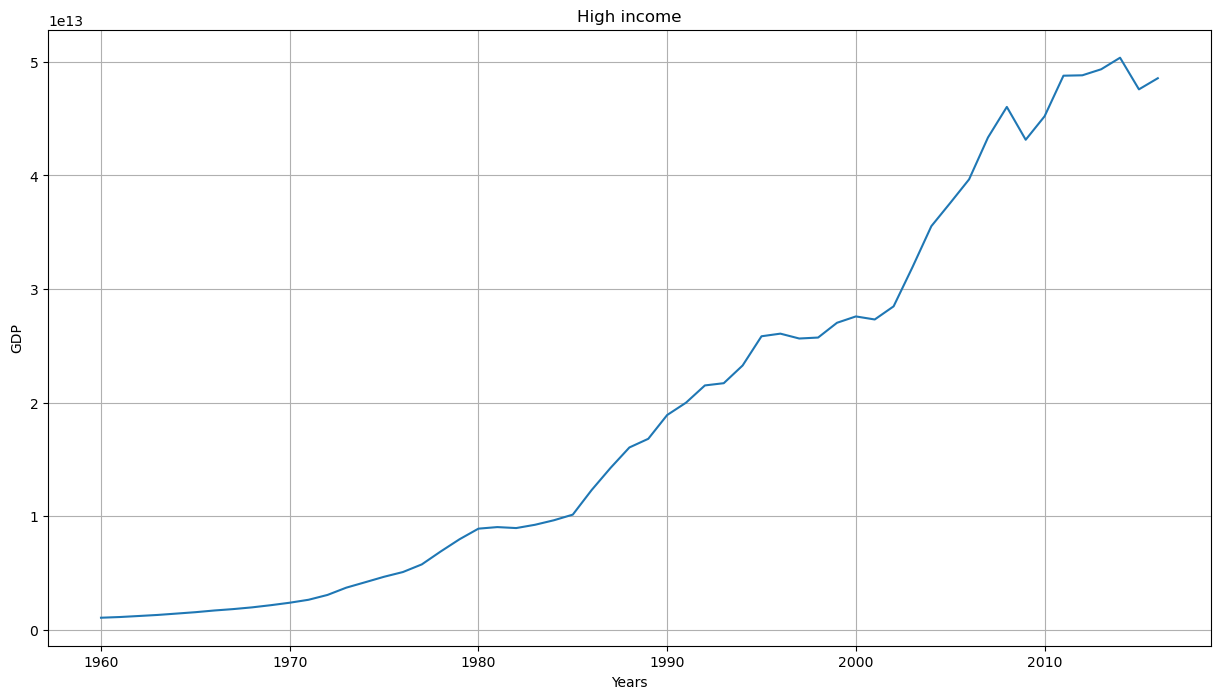

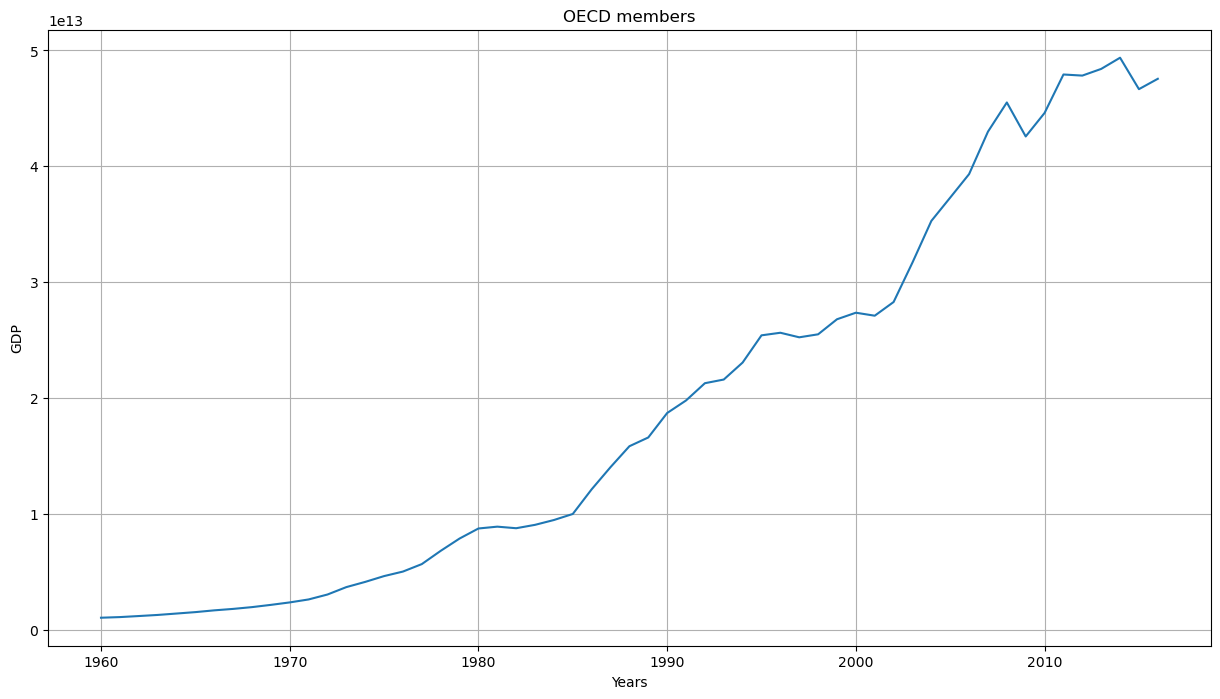

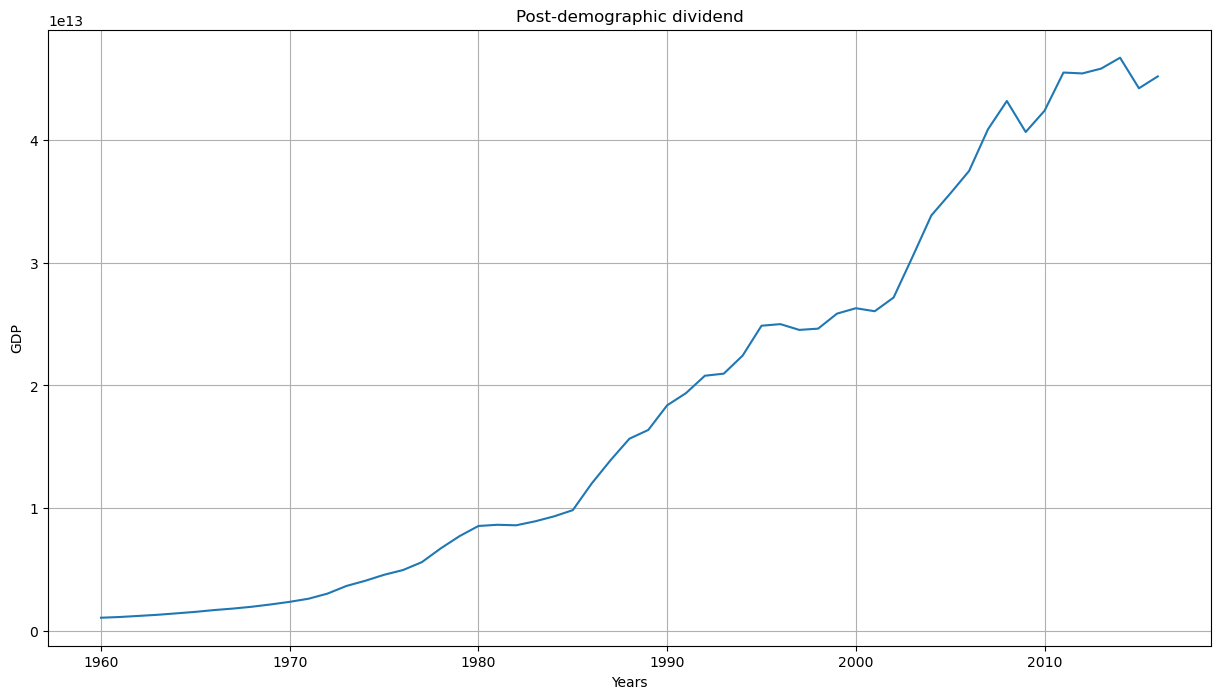

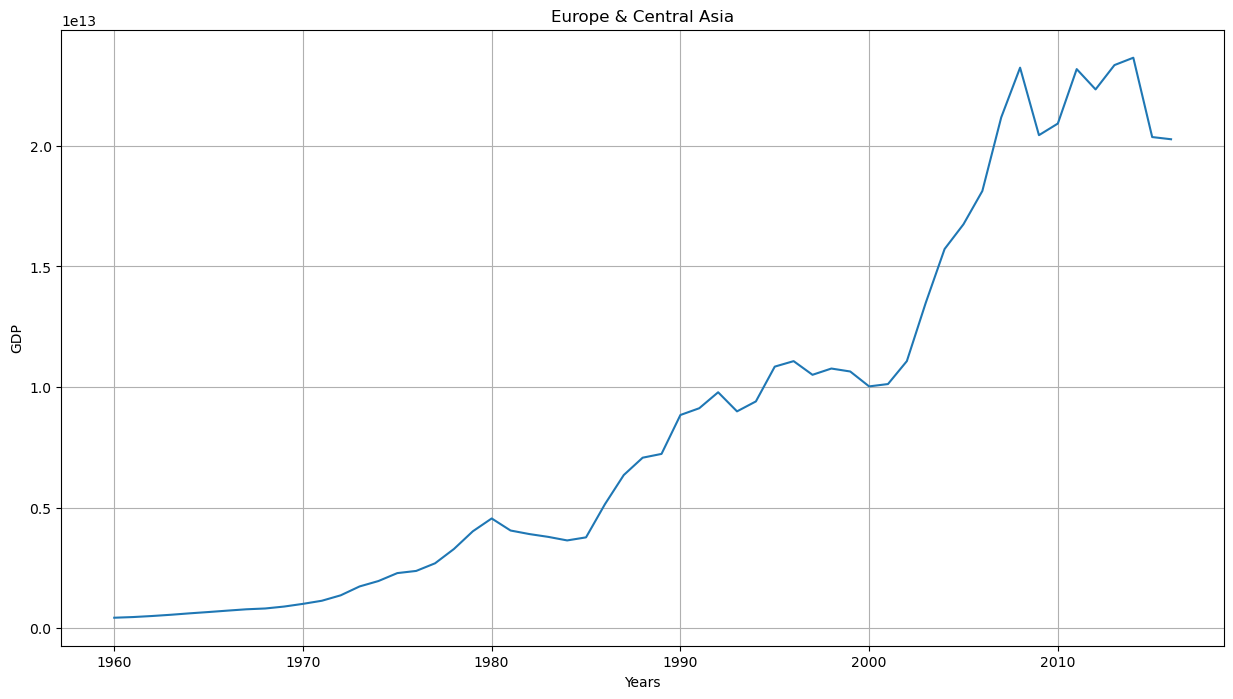

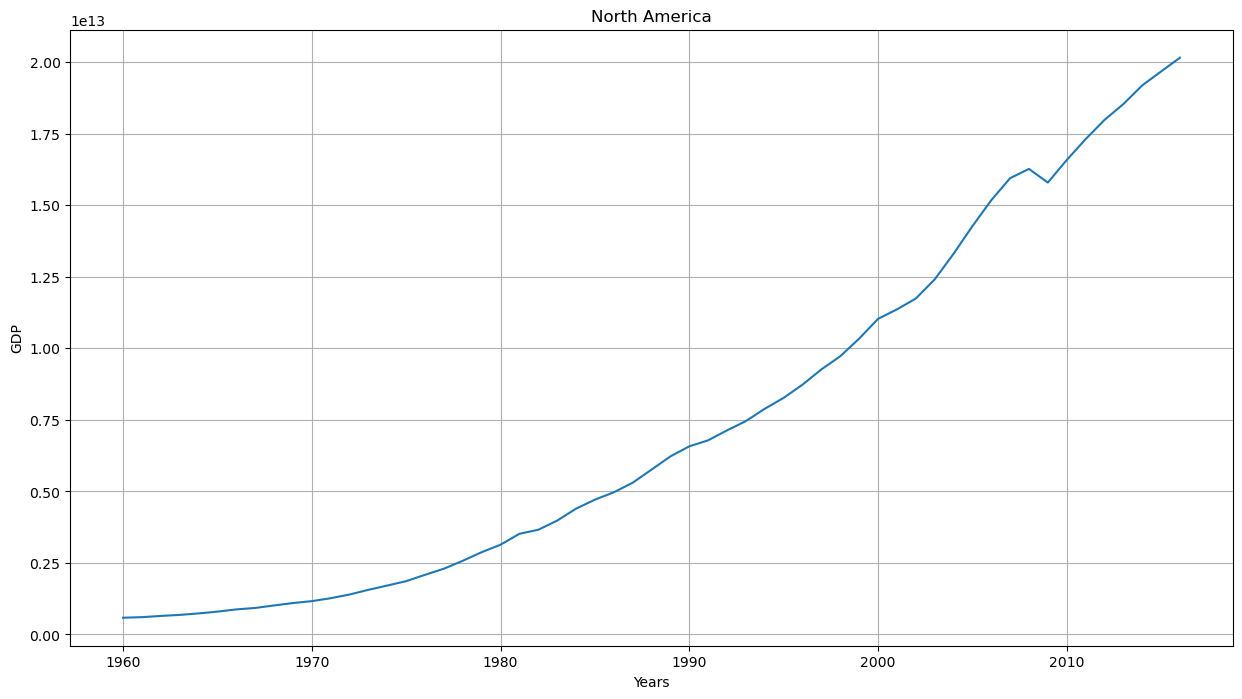

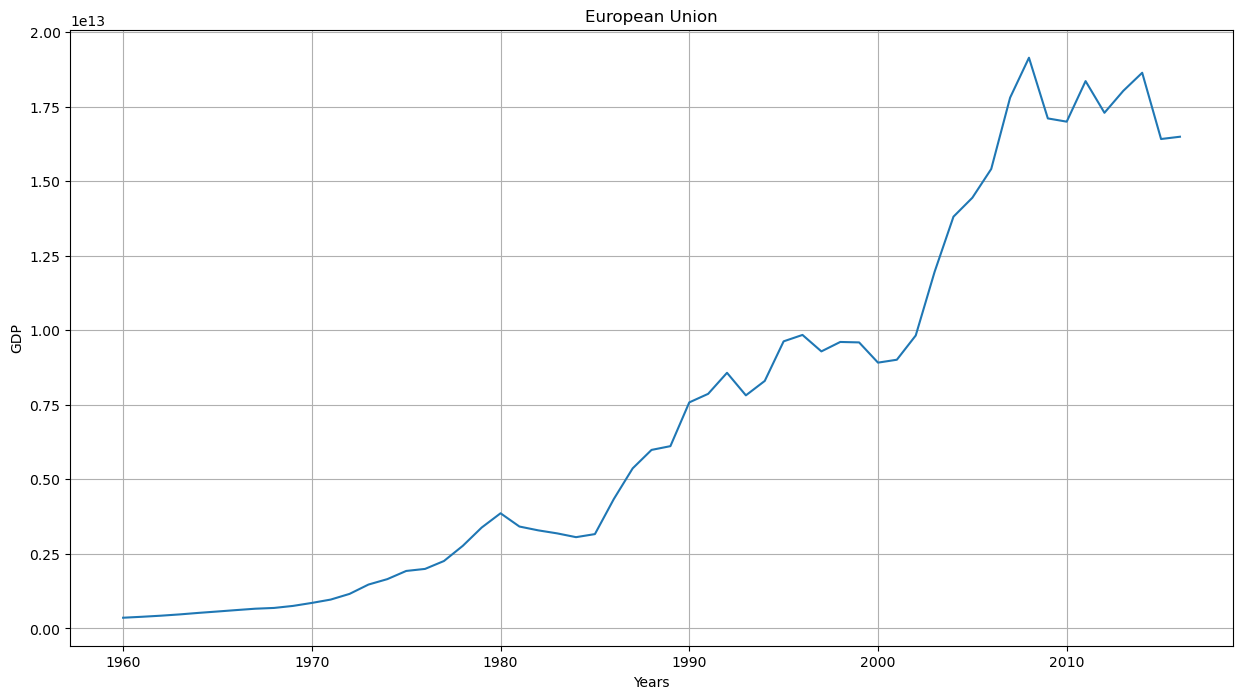

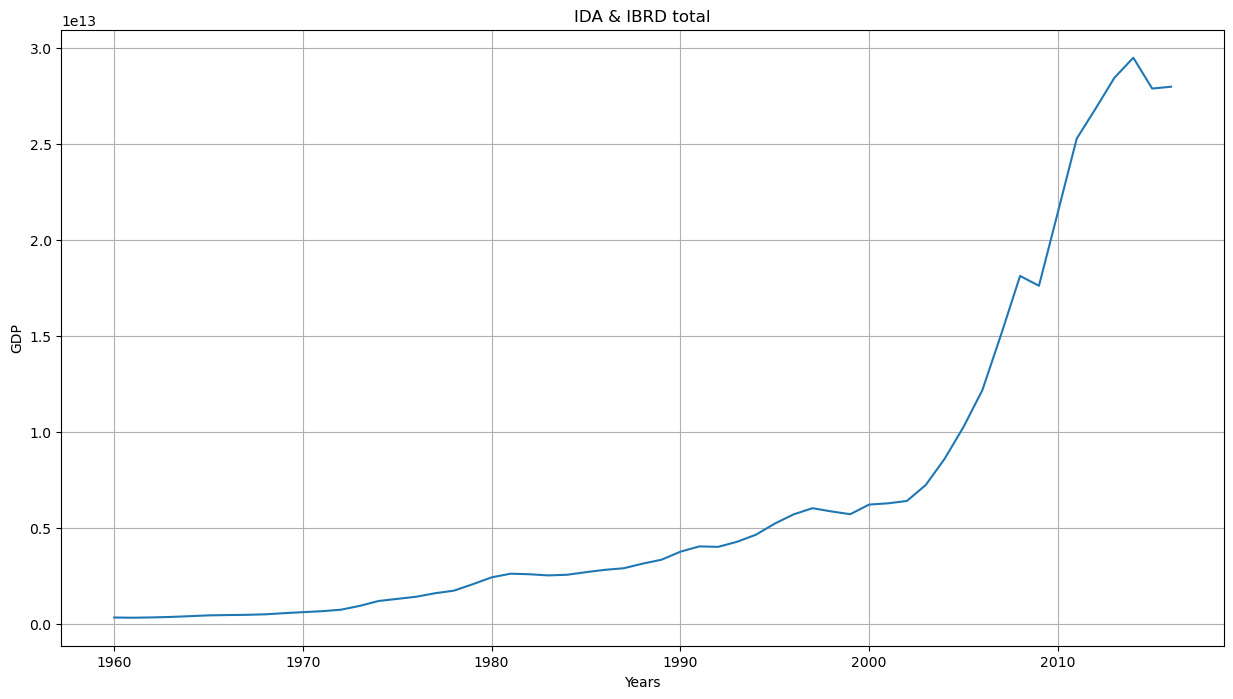

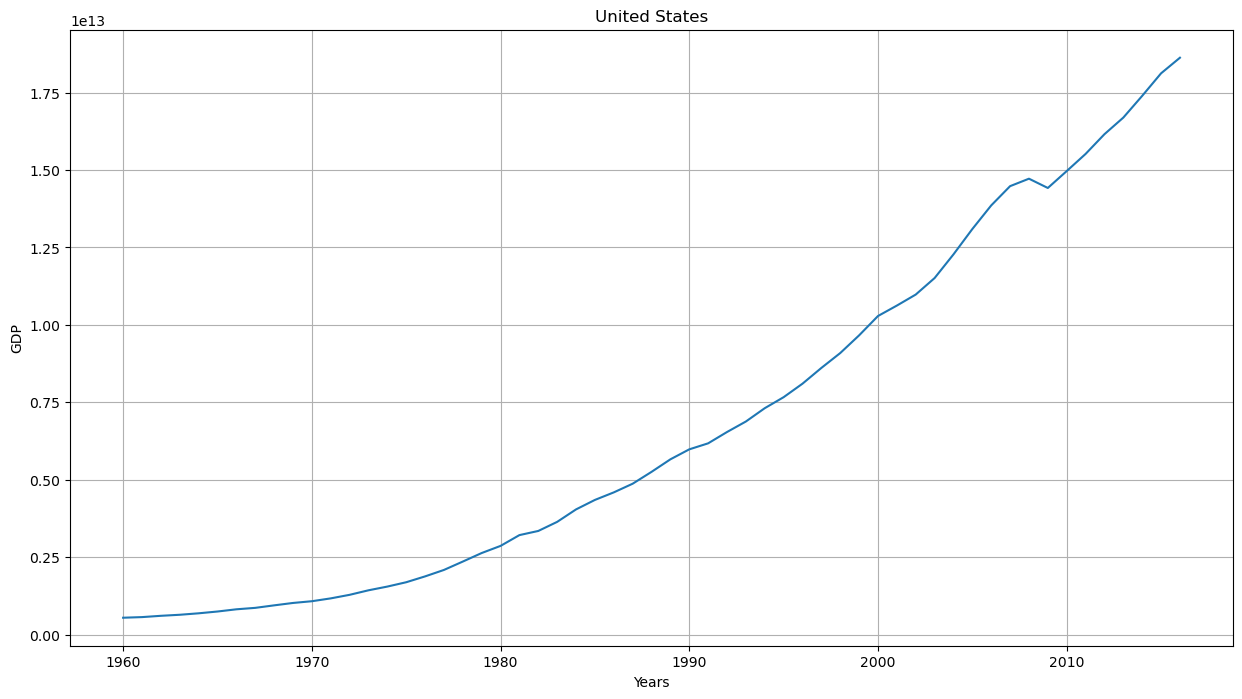

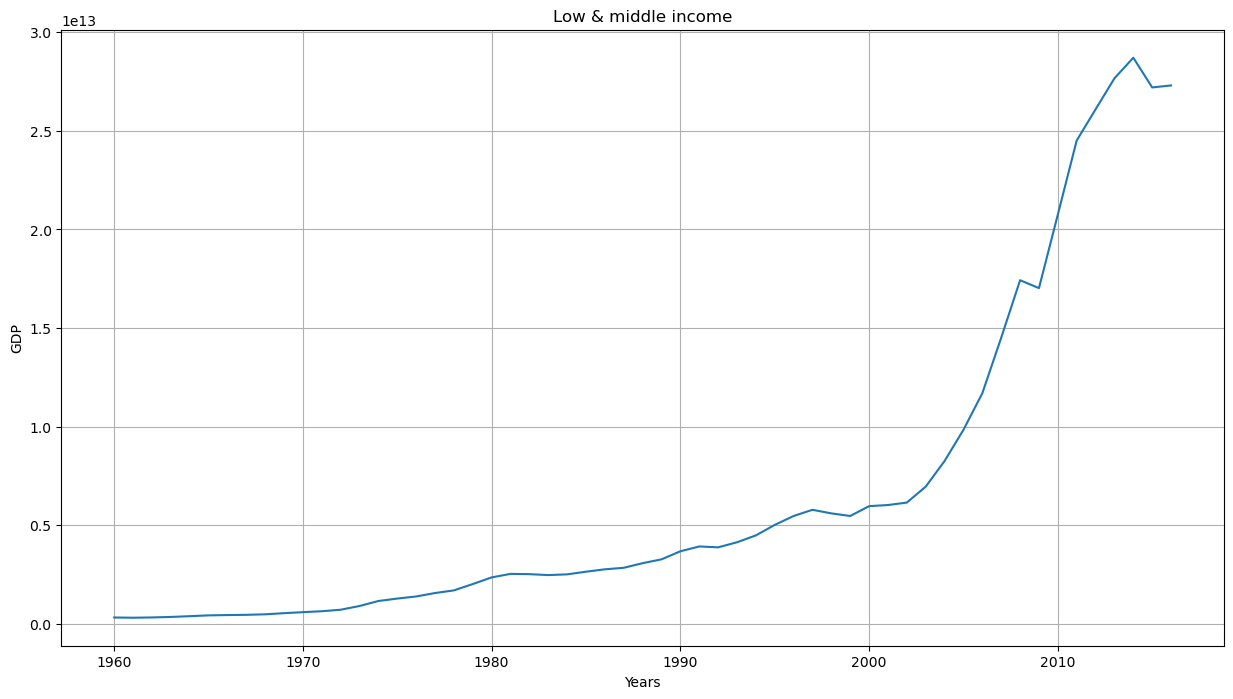

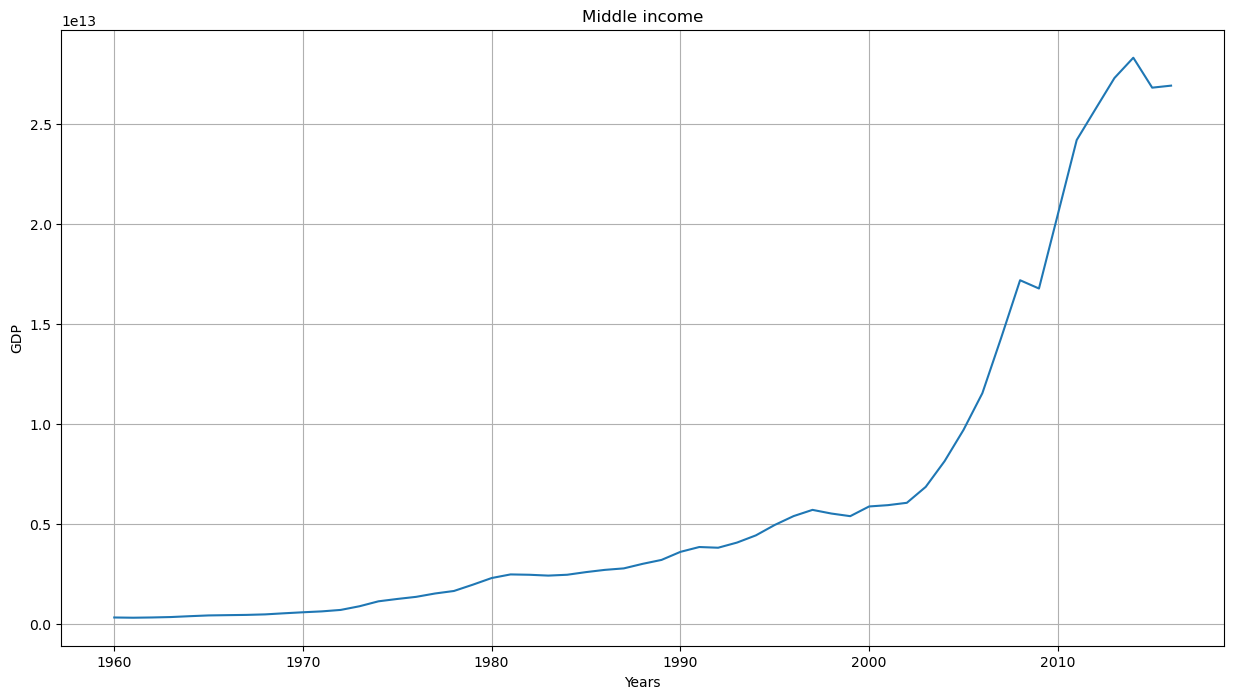

In [34]:
for country in country_names[:11]:
    df[df["Country Name"] == country].plot(kind = 'line', x = 'Year' ,y = 'Value',figsize = (15,8),
             legend = False, grid = True, ylabel = 'GDP', xlabel = 'Years',title = country)
    

# GDP Growth of a every  country

In [35]:
df_arab = df[df["Country Name"] == "Arab World"]

In [36]:
final_data = []
for country in df["Country Name"].unique():
    df_country = df[df["Country Name"] == country]
    data = df_country.values
    gdp_change = [0]
    for i in range(1,len(data)):
        curr = data[i][3]
        prev = data[i-1][3]
        gdp_change.append(round(((curr - prev)/prev)*100,2))
    df_country = df_country.assign(GDP = gdp_change)
    final_data.append(df_country)

In [37]:
df = pd.concat(final_data,axis = 0)
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [38]:
df.groupby("Country Name")["Value"].max()

Country Name
Afghanistan           2.053654e+10
Albania               1.322824e+10
Algeria               2.138100e+11
American Samoa        6.780000e+08
Andorra               4.016972e+09
                          ...     
West Bank and Gaza    1.339710e+10
World                 7.904923e+13
Yemen, Rep.           4.322858e+10
Zambia                2.804546e+10
Zimbabwe              1.661996e+10
Name: Value, Length: 256, dtype: float64

In [39]:
df.groupby("Country Name")["Year"].count().sort_values()

Country Name
Cayman Islands      2
Somalia             4
South Sudan         8
Channel Islands    10
Nauru              10
                   ..
Italy              57
Jamaica            57
Japan              57
North America      57
Zimbabwe           57
Name: Year, Length: 256, dtype: int64

In [40]:
df[df["Country Name"] == "Cayman Islands"]

,Country Name,Country Code,Year,Value,GDP
3863,Cayman Islands,CYM,1996,1.012444e+09,0.00
3864,Cayman Islands,CYM,2006,3.207033e+09,216.76


In [41]:
df_world = df[df["Country Name"] == 'World']

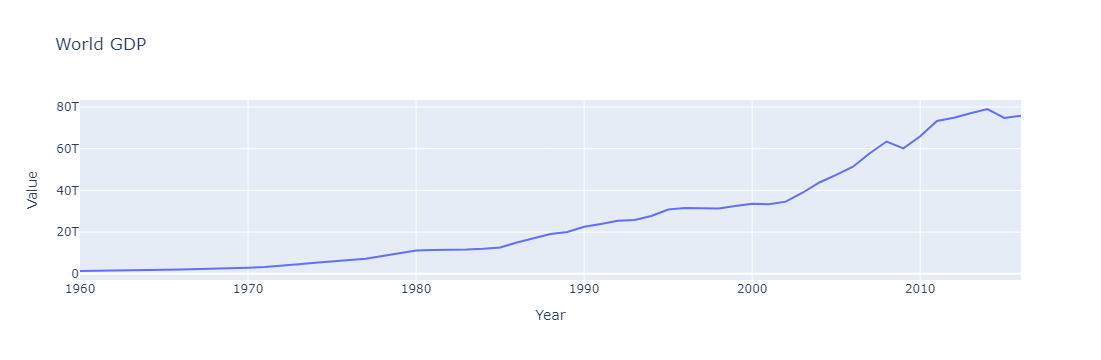

In [42]:
fig = px.line(df_world,x='Year',y = 'Value',title = 'World GDP')
fig

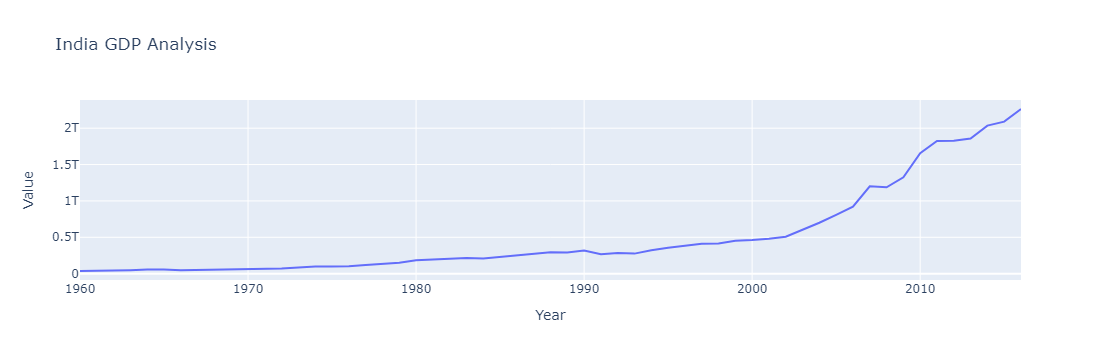

In [43]:
fig = px.line(df[df["Country Name"] == 'India'],x='Year',
              y = 'Value', title = 'India GDP Analysis')
fig

In [44]:
pyo.plot(fig,filename ='World GDp.html')

'World GDp.html'

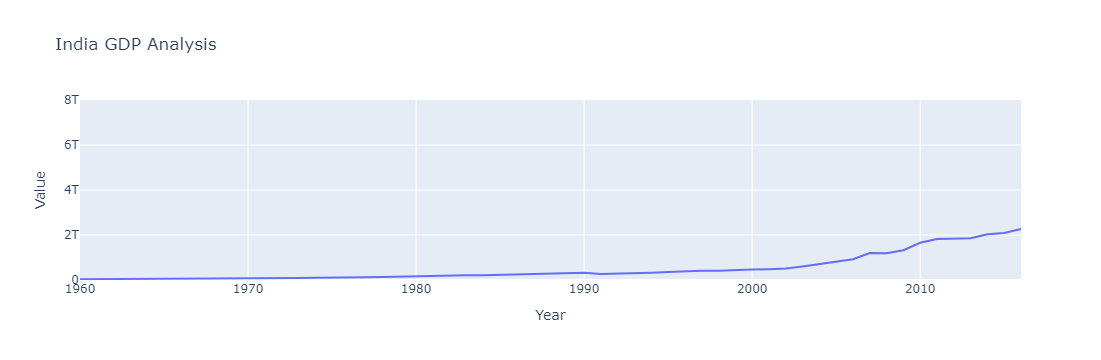

In [45]:
fig = px.line(df[df["Country Name"] == 'India'],x='Year',
              y = 'Value', title = 'India GDP Analysis',range_y = [0,8000000000000])
fig

# GDP of each country

In [46]:
os.mkdir('GDP Individual')
for country in df["Country Name"].unique():
    fig = px.line(df[df["Country Name"] == country],x='Year',
                  y = 'Value', title = country+' GDP Analysis')
    pyo.plot(fig,filename = 'GDP Individual/'+country+'.html',auto_open = False)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'GDP Individual'

# Compare GDP across countries

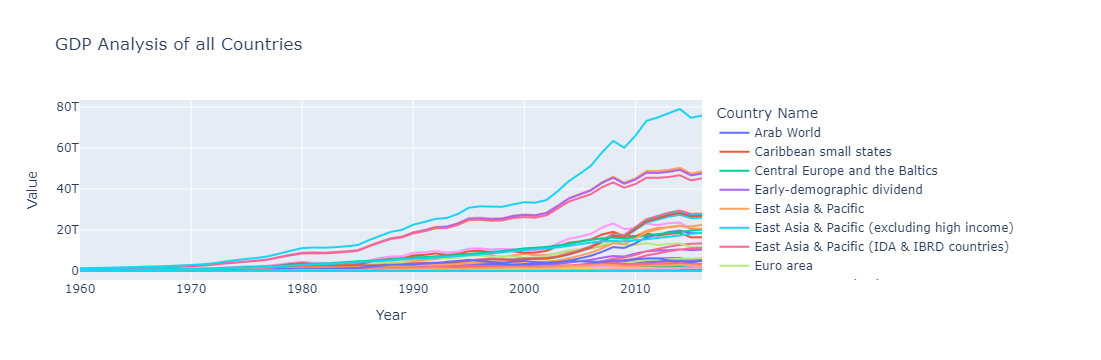

In [47]:
fig = px.line(df, x = 'Year',y = 'Value',title ='GDP Analysis of all Countries',color = 'Country Name')
fig

# GDP Comparison between India and China

In [48]:
d1 = df[df["Country Name"] == "China"]
d2 = df[df["Country Name"] == "India"]
d = pd.concat([d1,d2],axis = 0)
d

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


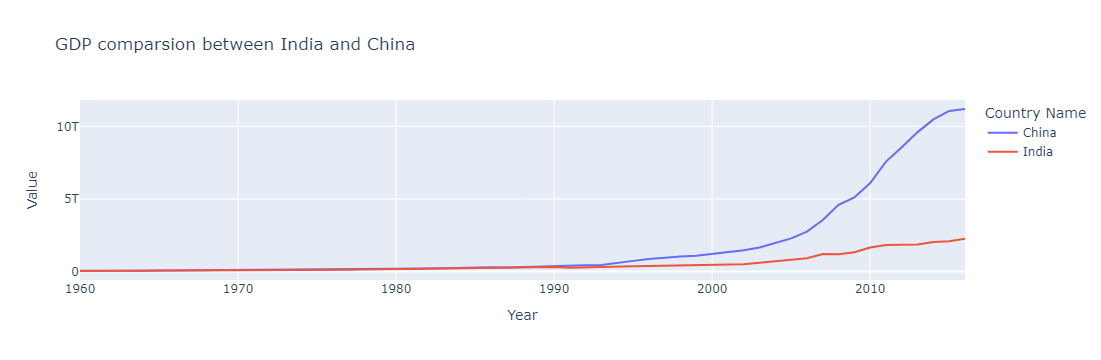

In [49]:
fig = px.line(d, x = 'Year',y = 'Value',title ='GDP comparsion between India and China',color = 'Country Name')
fig

## Comparing GDP Growth Comparison

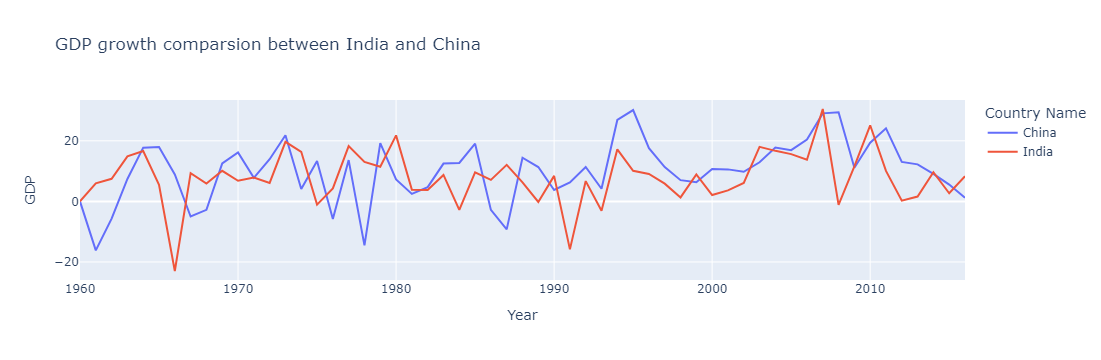

In [50]:
fig = px.line(d, x = 'Year',y = 'GDP',title ='GDP growth comparsion between India and China',color = 'Country Name')
fig